# Study Notes of pandas
## Series and DataFrame
Series and DataFrame are two workhourse structures of pandas. Think about the single columns or tables in Excel.
```javascript   
import pandas as pd
```

In [53]:
import pandas as pd
import numpy as np

### 1. Series
A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index. 

#### 1.1.  Example
```javascript
obj = pd.Series([4, 7, -5, 3])
```


In [3]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

The string representation of a Series displayed interactively shows the index on the left and the values on the right. Since we did not specify an index for the data, a default one consisting of the integers 0 through N - 1 (where N is the length of the data) is created. You can get the array representation and index object of the Series via its values and index attributes, respectively:
#### 1.2.  Example
```javascript
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
```

In [4]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [5]:
obj2.index 

Index(['d', 'b', 'a', 'c'], dtype='object')

Compared with NumPy arrays, you can use labels in the index when selecting single values or a set of values. This is very important because it allows us to conduct filtering easily.

```javascript
obj2['a']
obj2[['c','a','d']]
```

In [6]:
obj2['a']
obj2[['c','a','d']]

c    3
a   -5
d    4
dtype: int64

 create a Series from it by passing the dict
#### 1.3.  Example
```javascript
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
```
Overide the index by passing a new dict
```javascript
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4
```

In [7]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)

In [8]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [9]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [10]:
obj3.index = states

In [11]:
obj3

California    35000
Ohio          71000
Oregon        16000
Texas          5000
dtype: int64

Missing values are very common problems in data science projects. Be aware of how to detect missing values

In [12]:
obj4.isnull() 

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

A useful Series feature for many applications is that it automatically aligns by index label in arithmetic operations
```javascript
obj5 = pd.Series(sdata)
obj4_5 = obj4 + obj5
```

In [13]:
obj5 = pd.Series(sdata)
obj4_5 = obj4 + obj5

In [14]:
obj5

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [15]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [16]:
obj4_5

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

### 2. DataFrame
A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). Think about Excel!!!


### 2. DataFrame
A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). Think about Excel!!!
#### 2.1. Example
```javascript
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],        'year': [2000, 2001, 2002, 2001, 2002, 2003],        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]} frame = pd.DataFrame(data) 
```

In [17]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],        'year': [2000, 2001, 2002, 2001, 2002, 2003],        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [18]:
frame = pd.DataFrame(data)

In [19]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


Rearange the column order

In [20]:
frame1=pd.DataFrame(data, columns=['year', 'state', 'pop']) 

In [21]:
frame1.head()

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [23]:
 frame1.columns

Index(['year', 'state', 'pop'], dtype='object')

In [24]:
frame1.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [25]:
frame1['year']

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

#### 2.2. Example
```javascript
 frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five', 'six'])
```

In [26]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five', 'six'])

In [27]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [34]:
 frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [30]:
frame2.iloc[1]

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object

In [40]:
 frame2.loc[['three','two']]

,year,state,pop,debt
three,2002,Ohio,3.6,NaN
two,2001,Ohio,1.7,NaN


In [35]:
frame2.iloc[0:2]

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN


Add a new column

In [41]:
 frame2['eastern'] = frame2.state == 'Ohio'

In [42]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


Delete a column

In [44]:
del frame2['eastern']

In [45]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


### 3. Essential Functionality 
 Fundamental mechanics of interacting with the data contained in a Series or DataFrame.
#### 3.1 Example
Reindex - Series
```javascript
 obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
 obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
```
Reindex - DataFrame
```javascript
 frame = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])
 frame2 = frame.reindex(['a', 'b', 'c', 'd'])
```

In [46]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [47]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [48]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [58]:
frame4 = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])
frame5 = frame4.reindex(['c','b','d','a'])

In [59]:
frame4

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [60]:
frame5

,Ohio,Texas,California
c,3.0,4.0,5.0
b,NaN,NaN,NaN
d,6.0,7.0,8.0
a,0.0,1.0,2.0


#### 3.2. Example
For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing. The method option allows us to do this, using a method such as ffill, which forward-fills the values
```javascript
 obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
 obj3.reindex(range(6), method='ffill') 
```

In [61]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill') 

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

#### 3.3. Example
Dropping engries
```javascript
new_obj = obj.drop('c')
new_frame = frame2.drop(['one'])
```

In [63]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [65]:
new_obj = obj.drop('c')

In [66]:
new_obj

d    4.5
b    7.2
a   -5.3
dtype: float64

In [68]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [71]:
new_frame = frame2.drop(['one'])

In [72]:
new_frame

,year,state,pop,debt
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [73]:
new_frame1 = frame2.drop('debt',axis=1)

In [74]:
new_frame1

,year,state,pop
one,2000,Ohio,1.5
two,2001,Ohio,1.7
three,2002,Ohio,3.6
four,2001,Nevada,2.4
five,2002,Nevada,2.9
six,2003,Nevada,3.2


You can also modify the original dataframe by using the inplace argument. Need to be cautious about using this

In [75]:
obj.drop('c', inplace=True)

In [76]:
obj

d    4.5
b    7.2
a   -5.3
dtype: float64

#### 3.4. Example
Arithmetic methods with fill values 
```javascript
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1 + df2
df1.add(df2, fill_value=0) 
```
Method | Description
------------ | -------------
add, radd | Methods for addition (+)
sub, rsub | Methods for subtraction (-)
div, rdiv | Methods for division (/)
floordiv, rfloordiv | Methods for floor division (//)
mul, rmul | Methods for multiplication (*)
pow, rpow | Methods for exponentiation (**)

In [77]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [78]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [79]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [80]:
df2.loc[1, 'b'] = np.nan

In [81]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [82]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


#### 3.5. Example
Function Application and Mapping NumPy ufuncs (element-wise array methods) also work with pandas objects
```javascript
frame
frame['val']=[-3,-1,0,3,-4,6]
del frame['state']
np.abs(frame)
```

In [83]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [89]:
frame['val']=[-3,-1,0,3,-4,6]

In [90]:
frame

,state,year,pop,val
0,Ohio,2000,1.5,-3
1,Ohio,2001,1.7,-1
2,Ohio,2002,3.6,0
3,Nevada,2001,2.4,3
4,Nevada,2002,2.9,-4
5,Nevada,2003,3.2,6


In [92]:
del frame['state']

In [93]:
frame

,year,pop,val
0,2000,1.5,-3
1,2001,1.7,-1
2,2002,3.6,0
3,2001,2.4,3
4,2002,2.9,-4
5,2003,3.2,6


In [94]:
np.abs(frame)

,year,pop,val
0,2000.0,1.5,3.0
1,2001.0,1.7,1.0
2,2002.0,3.6,0.0
3,2001.0,2.4,3.0
4,2002.0,2.9,4.0
5,2003.0,3.2,6.0


#### 3.6. Example
```javascript
f = lambda x: x.max() / x.min()
frame.apply(f)
frame_new = frame.apply(f, axis='columns')
format = lambda x: '%.2f' % x
frame.applymap(format)
frame['val'].map(format) 
```   

In [95]:
f = lambda x: x.max() / x.min()

In [96]:
frame.apply(f)

year    1.0015
pop     2.4000
val    -1.5000
dtype: float64

In [99]:
frame_new = frame.apply(f, axis='columns')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [98]:
format = lambda x: '%.2f' % x

In [101]:
frame.applymap(format)

,year,pop,val
0,2000.00,1.50,-3.00
1,2001.00,1.70,-1.00
2,2002.00,3.60,0.00
3,2001.00,2.40,3.00
4,2002.00,2.90,-4.00
5,2003.00,3.20,6.00


In [102]:
frame['val'].map(format)

0    -3.00
1    -1.00
2     0.00
3     3.00
4    -4.00
5     6.00
Name: val, dtype: object

#### 3.7. Example
Sorting and Ranking
```javascript
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()
frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'], columns=['d', 'a', 'b', 'c']) 
frame.sort_index()
frame.sort_index(axis=1) 
frame.sort_index(axis=1, ascending=False)
obj.sort_values()
frame.sort_values(by=['a', 'b'])
obj.rank() 
obj.rank(method='first')
frame.rank(axis='columns')    
```
Method | Description
------------ | -------------
'average' | Default: assign the average rank to each entry in the equal group
'min','max' | Use the minimum/maximum rank for the whole group 
'first' | Assign ranks in the order the values appear in the data 
'dense' | Like method='min', but ranks always increase by 1 in between groups rather than the number of equal elements in a group

In [103]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()
frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'], columns=['d', 'a', 'b', 'c']) 
frame.sort_index()
frame.sort_index(axis=1) 
frame.sort_index(axis=1, ascending=False)
obj.sort_values()
frame.sort_values(by=['a', 'b'])
obj.rank() 
obj.rank(method='first')
frame.rank(axis='columns')

,d,a,b,c
three,1.0,2.0,3.0,4.0
one,1.0,2.0,3.0,4.0


In [104]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [105]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [106]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [107]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [108]:
obj.sort_values()

d    0
a    1
b    2
c    3
dtype: int64

In [109]:
frame.sort_values(by=['a', 'b'])

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [110]:
obj.rank() 

d    1.0
a    2.0
b    3.0
c    4.0
dtype: float64

In [111]:

obj.rank(method='first')


d    1.0
a    2.0
b    3.0
c    4.0
dtype: float64

#### 3.8. Example
Axis Indexes with Duplicate Labels
```javascript
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj.index.is_unique
obj['a']
``` 

In [112]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj.index.is_unique
obj['a']

a    0
a    1
dtype: int64

### 4. Computation
pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame
#### 4.1. Example
```javascript
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], index=['a', 'b', 'c', 'd'],                 columns=['one', 'two'])
df.sum()
df.sum(axis='columns')
df.mean(axis='columns', skipna=False)
```  

In [113]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], index=['a', 'b', 'c', 'd'],                 columns=['one', 'two'])


In [114]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [115]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [116]:
df.sum(axis='columns')


a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [117]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [118]:
 df.describe() 

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


#### 4.2. Example
```javascript    
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4], 'Qu2': [2, 3, 1, 2, 3],  'Qu3': [1, 5, 2, 4, 4]})
result = data.apply(pd.value_counts).fillna(0)
```

In [119]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4], 'Qu2': [2, 3, 1, 2, 3],  'Qu3': [1, 5, 2, 4, 4]})


In [120]:
result = data.apply(pd.value_counts).fillna(0)

In [121]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [122]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [126]:
% pwd

'C:\\Users\\Ray'

### 5. Read Files
We will use pandas to read a csv file and conduct some basic calculations.
data source: [https://www.kaggle.com/crawford/80-cereals/version/2#cereal.csv](url)
[80-cereals.zip](https://github.com/Calgary-Data-Science-Study-Group/python-study/files/2799568/80-cereals.zip)
Download the attached file and unzip it.
get your local directory
```javascript
% pwd
cereal_df = pd.read_csv("data/cereal.csv")
cereal_df1 = pd.read_csv("data/cereal.csv", skiprows = 1, na_values = ['no info', '.'])
cereal_df2 = pd.read_csv("data/cereal.csv", na_values = ['no info', '.'])
```  

In [127]:
cereal_df = pd.read_csv("data/cereal.csv")

In [128]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [129]:
cereal_df1 = pd.read_csv("data/cereal.csv", skiprows = 1, na_values = ['no info', '.'])

In [130]:
cereal_df1.head()

,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1.1,0.33,68.402973
0,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [131]:
cereal_df2 = pd.read_csv("data/cereal.csv", na_values = ['no info', '.'])

In [132]:
cereal_df2.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [133]:
cereal_df2.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


####  import matplotlib, a visualization library for pandas/python
```javascript
import matplotlib.pyplot as plt
import seaborn as sns
```  


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

####  pick a column with numeric variables
```javascript
calories = cereal_df2[cereal_df2.calories>100]['calories']
protein = cereal_df2.protein
potass = cereal_df2['potass']
```

#### plot a histogram of the column
```javascript
plt.hist(calories)
plt.title("Calories in Cereals")
```

In [139]:
calories = cereal_df2[cereal_df2.calories>100]
protein = cereal_df2.protein
potass = cereal_df2['potass']

In [140]:
calories.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562


In [141]:
calories = cereal_df2[cereal_df2.calories>100]['calories']

In [142]:
calories

1     120
4     110
5     110
6     110
7     130
10    120
11    110
12    120
13    110
14    110
15    110
17    110
18    110
19    110
21    110
24    110
25    110
27    120
28    120
29    110
31    110
33    110
34    120
35    120
36    110
37    110
38    110
39    140
40    110
42    110
44    150
45    150
46    160
48    120
49    140
51    130
52    120
58    120
61    110
62    110
66    110
67    110
69    110
70    140
72    110
73    110
76    110
Name: calories, dtype: int64

Text(0.5,1,'Calories in Cereals')

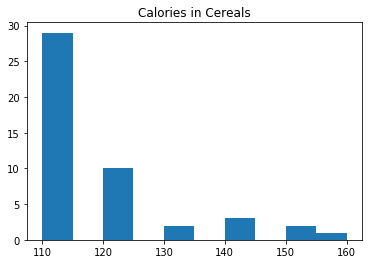

In [143]:
plt.hist(calories)
plt.title("Calories in Cereals")

Count cereal products from each manufacturer

In [145]:
Manufacturer_of_cereals = cereal_df2['mfr'].unique()
mfr_count = []
for mnfc in Manufacturer_of_cereals:
    mfr_count.append(cereal_df2[cereal_df2['mfr'] == mnfc]['mfr'].count())

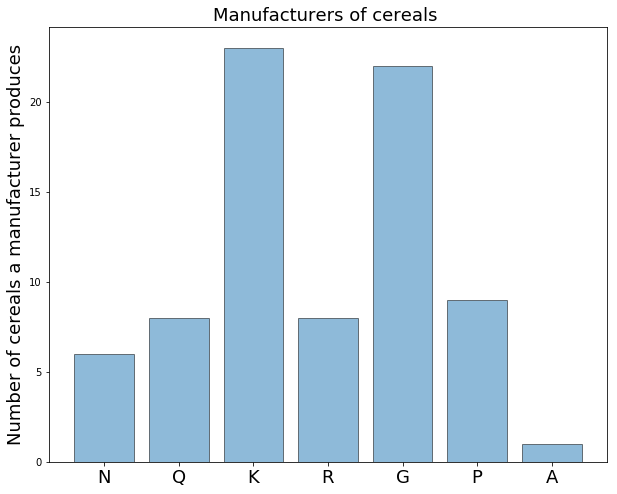

In [146]:
x = np.arange(len(Manufacturer_of_cereals))
plt.figure(figsize=(10,8))
plt.bar(x, mfr_count, align='center', alpha=0.5, edgecolor = 'black')
plt.xticks(x, Manufacturer_of_cereals, fontsize=18 )
plt.ylabel('Number of cereals a manufacturer produces', fontsize=18 )
plt.title('Manufacturers of cereals ', fontsize=18)
 
plt.show()

Additional Interactive data visualization: Pie chart

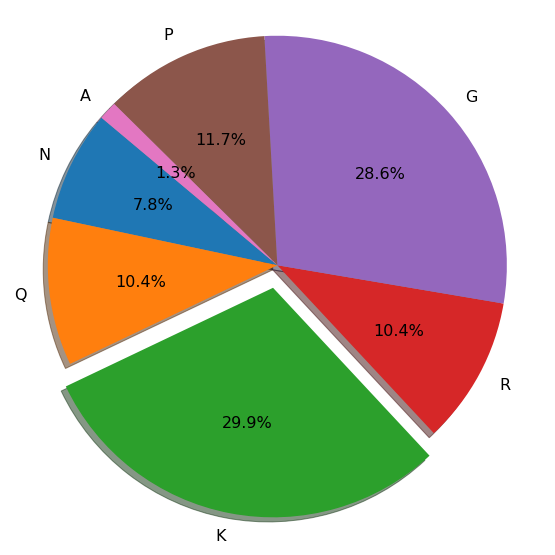

In [147]:
explode = (0, 0, 0.1, 0, 0, 0, 0)  # explode 1st slice
 
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 16
plt.pie(mfr_count, 
        explode=explode, 
        labels=Manufacturer_of_cereals, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle = 140 )
 
plt.axis('equal')
plt.tight_layout()
plt.show()